In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('./data/sample/human_test_vlen.txt',header=None, encoding='utf-8',names=['seq'])
test.loc[:,'data_type']='test'
val = pd.read_csv('./data/sample/human_val_vlen.txt',header=None, encoding='utf-8',names=['seq'])
val.loc[:,'data_type']='val'
train = pd.read_csv('./data/sample/human_train_vlen.txt',header=None, encoding='utf-8',names=['seq'])
train.loc[:,'data_type']='train'

data=pd.concat([test,val,train])
data['seq_len'] = data.seq.str.len()
len(data), len(val), len(test), len(train)

(510101, 76515, 76515, 357071)

# Check output of trained model

In [2]:
from ablstm import ModelLSTM
from model import evaluate
from utils_data import ProteinSeqDataset
import torch
import pandas as pd
model = ModelLSTM(embedding_dim=64, hidden_dim=64, device='cpu', gapped=True, fixed_len=False)
model.load(fn='./saved_models/human/lstm_0.704043.npy')

In [3]:
train_tst_scores, train_predictions, train_acc_mean = evaluate(model, file_path='./data/sample/human_train_vlen.txt', batch_size=512, gapped=True)
test_tst_scores, test_predictions, test_acc_mean = evaluate(model, file_path='./data/sample/human_val_vlen.txt', batch_size=512, gapped=True)
val_tst_scores, val_predictions, val_acc_mean = evaluate(model, file_path='./data/sample/human_val_vlen.txt', batch_size=512, gapped=True)
train_acc_mean, test_acc_mean, val_acc_mean

100%|| 76515/76515 [00:51<00:00, 1497.09seq/s]


(0.82314368457934, 0.8226999070476345, 0.8226999070476345)

In [24]:
train['pred'] = [''.join(pred) for batch in train_predictions for pred in batch]
train['score'] = train_tst_scores
test['pred'] = [''.join(pred) for batch in test_predictions for pred in batch]
test['score'] = test_tst_scores
val['pred'] = [''.join(pred) for batch in val_predictions for pred in batch]
val['score'] = val_tst_scores

In [34]:
train.to_csv('./output/train_predicted.csv')
test.to_csv('./output/test_predicted.csv')
val.to_csv('./output/val_predicted.csv')

In [25]:
train.head(2)

,seq,data_type,pred,score
0,EVRLTESGGGLVQPGGSLRLSCAASGFPFGDYAMHWVRQPAERGIE...,train,EVQLVESGGGLVQPGGSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,1.088260
1,DVQLVDSGGGLVQPGGSLRLSCAASGFTVSNSYIHWVRQAPGKGLE...,train,DVQLVDSGGGLVQPGGSLRLSCAASGFTVSNSYIHWVRQAPGKGLE...,0.245992


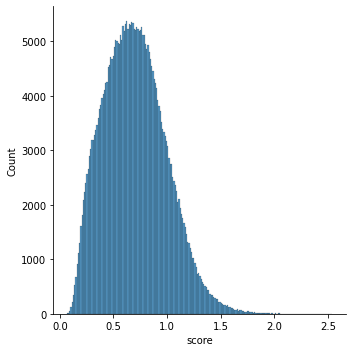

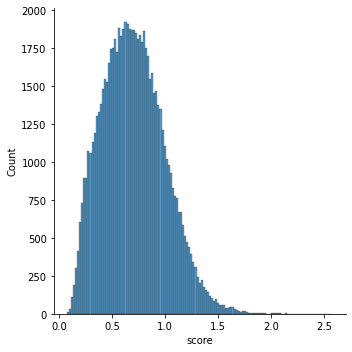

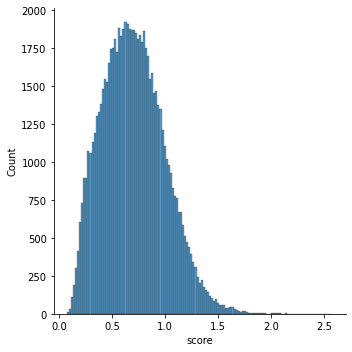

In [28]:
sns.displot(train.score)
sns.displot(test.score)
sns.displot(val.score)

# Mouse seq vs human model

In [32]:
mouse = pd.read_csv('./data/sample/mouse_test_vlen.txt',header=None, encoding='utf-8',names=['seq'])
mouse_tst_scores, mouse_predictions, mouse_acc_mean = evaluate(model, file_path='./data/sample/mouse_test_vlen.txt', batch_size=512, gapped=True)

100%|| 500000/500000 [05:04<00:00, 1640.38seq/s]


In [33]:
mouse_acc_mean

0.6128759582195046

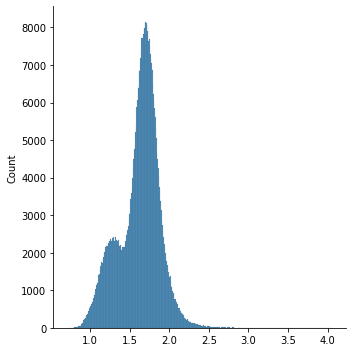

In [35]:
sns.displot(mouse_tst_scores)